# 2. Filtrado y procesamiento de la señal EEG

**Materias relacionadas:** Algoritmos Computacionales, Morfofuncional II, Física del Cuerpo Humano, Instrumentación Biomédica, Electrofisiología, Temas Selectos en Biomatemáticas y Temas Selectos en Biofísica.

**Antecedentes:** Notebook 1

**Objetivos:** Comprender el proceso de filtrado y procesamiento de la señal EEG, y aplicar estos algoritmos a datos reales obtenidos con el sistema *Emotiv EPOC+*, equipo con el que ya se trabajó en el notebook anterior. 



## 2.1 Filtrado de la señal

En el Notebook 1 se observó la señal EEG en su forma cruda, donde se apreciaban artefactos y fluctuaciones no fisiológicas.  
El siguiente paso es aplicar métodos de **procesamiento digital** que permitan **aumentar la relación señal–ruido** y preparar los datos para análisis espectrales más avanzados.

El **filtrado paso banda** es una herramienta fundamental para este tipo de análisis. Su función es conservar las frecuencias donde se localizan las oscilaciones cerebrales relevantes (delta, theta, alfa, beta y gamma), atenuando tanto las componentes lentas (como la deriva de línea base) como las altas (ruido electromagnético o muscular). Este proceso es esencial para mejorar la calidad de los datos sin distorsionar las características fisiológicas del EEG (Addison, 2017).

El procesamiento digital de señales aplicado a registros electroencefalográficos requiere una comprensión sólida de los principios que rigen la **adquisición, digitalización y filtrado** de señales biomédicas.  
Las señales de EEG presentan propiedades particulares —baja amplitud, alta sensibilidad al ruido y comportamiento no estacionario— que demandan estrategias específicas de preprocesamiento para evitar la pérdida de información cerebral significativa (Hari & Puce, 2017).  
Diversos estudios han mostrado que la calidad del filtrado tiene un impacto directo en la interpretación de las oscilaciones corticales y que un mal diseño de filtros puede inducir artefactos o alterar las bandas fisiológicas de interés (Allen & Rabiner, 1977).

En este notebook se emplea un filtro paso banda de **1–45 Hz**, rango suficiente para preservar la mayor parte de la actividad cortical sin incluir el ruido de línea eléctrica (60 Hz) ni las fluctuaciones lentas del potencial.


### 2.1.1 Digitalización y teorema de muestreo

El **teorema de muestreo de Nyquist–Shannon** establece que una señal continua puede representarse digitalmente si la frecuencia de muestreo es al menos el doble de la frecuencia máxima presente en ella.  
En el caso del EEG, las frecuencias relevantes se encuentran principalmente entre **0.5 y 100 Hz**, por lo que una frecuencia de muestreo de **128 Hz**, como la que utiliza el sistema *Emotiv EPOC+*, es adecuada para analizar componentes de hasta aproximadamente **64 Hz**, evitando el aliasing o solapamiento espectral (Saptono et al., 2016).

El paso de una señal analógica a su versión digital implica además un proceso de **cuantización**, es decir, la discretización de los valores de amplitud. Este proceso puede generar errores de redondeo si la resolución del convertidor analógico–digital es insuficiente.  
El equipo Emotiv incorpora un convertidor de 14 bits, lo que otorga una resolución apropiada para registrar potenciales corticales de baja amplitud dentro del rango fisiológico esperado (EMOTIV, 2016).


### 2.1.2 Características del ruido en señales EEG

Las señales electroencefalográficas están expuestas a múltiples fuentes de **ruido y artefactos**, que deben identificarse y reducirse antes de realizar cualquier análisis cuantitativo. Estos pueden clasificarse según su origen (Ramos-Argüelles et al., 2009):

1. **Ruido de línea eléctrica (50/60 Hz):** interferencia proveniente de la red de suministro eléctrico.  
2. **Artefactos oculares:** movimientos y parpadeos que producen deflexiones de alta amplitud.  
3. **Artefactos musculares (EMG):** actividad electromiográfica superpuesta a la señal cerebral.  
4. **Ruido de contacto:** variaciones en la impedancia de los electrodos y micro-movimientos del sujeto.  
5. **Deriva de línea base:** fluctuaciones lentas causadas por la polarización de los electrodos, cambios de temperatura o sudoración.

Como se ha señalado en la literatura, el éxito del análisis de EEG depende más de la **calidad del preprocesamiento** que del método de análisis posterior (Hari & Puce, 2017).  
Por ello, esta sección busca ilustrar de forma práctica cómo eliminar las principales fuentes de ruido sin alterar la estructura temporal ni el contenido fisiológico de la señal cerebral.



## 2.2 Filtrado digital de la señal EEG: fundamentos y diseño práctico

El **filtrado digital** es una de las etapas más importantes del procesamiento del EEG, ya que permite separar la información cerebral relevante del ruido introducido durante la adquisición.  
En este proyecto se implementa un **filtro paso banda de 2–45 Hz**, diseñado para conservar las frecuencias neurofisiológicas de interés y eliminar interferencias producidas por la actividad muscular, el parpadeo, el movimiento y la red eléctrica.



### 2.2.1 Fundamentación teórica

En los registros electroencefalográficos, la señal medida puede modelarse como la suma de dos componentes:

\[
x(t) = s(t) + n(t)
\]

donde \( s(t) \) representa la actividad cortical y \( n(t) \) el ruido aditivo de distinta naturaleza.  
El propósito del filtrado es reducir \( n(t) \) sin alterar la estructura temporal y espectral de \( s(t) \).

El filtrado digital permite operar sobre la señal mediante funciones matemáticas conocidas como **respuestas en frecuencia**, que definen qué componentes espectrales pasan o se atenúan (Allen & Rabiner, 1977).  
En el EEG, los filtros más utilizados son los **paso bajos**, **paso altos** y **paso banda**, siendo este último el más apropiado para aislar las bandas fisiológicas de oscilación cerebral (delta, theta, alfa, beta y gamma).  

Las señales cerebrales son de **baja amplitud** (10–100 μV) y extremadamente sensibles a artefactos externos e internos. Por ello, la elección de los parámetros del filtro debe realizarse con cautela para evitar deformaciones o pérdida de información relevante (Hari & Puce, 2017).  



### 2.2.2 Banda de paso 2–45 Hz: justificación neurofisiológica y experimental

La banda de paso **2–45 Hz** se adopta como estándar en este proyecto por varias razones:

1. **Eliminación de artefactos de baja frecuencia (<2 Hz):**  
   Las fluctuaciones lentas se asocian a la deriva de línea base, movimientos oculares y cambios en la impedancia de los electrodos. Al filtrar por encima de 2 Hz, se preserva la estabilidad del registro sin perder información cortical significativa (Addison, 2017).


3. **Supresión de ruido de alta frecuencia (>45 Hz):**  
   Las frecuencias superiores suelen contener interferencia electromagnética (50/60 Hz) y actividad muscular. Limitar el rango superior a 45 Hz elimina la mayor parte de estos contaminantes (Widmann et al., 2015).

4. **Preservación de las bandas corticales relevantes:**  
   El rango 2–45 Hz incluye las bandas **theta (4–7 Hz)**, **alfa (8–12 Hz)**, **beta (13–30 Hz)** y parte de la **gamma baja (30–45 Hz)**, que contienen información relacionada con la atención, el estado de alerta y la actividad sensoriomotora (Hari & Puce, 2017).

5. **Consistencia con protocolos experimentales previos:**  
   Los estudios realizados por **González et al. (2023)** con el sistema *Emotiv EPOC+* recomiendan una banda de paso de **2–45 Hz** como óptima para registros en estado de reposo, ya que reduce eficazmente los artefactos oculares sin afectar las oscilaciones alfa observadas en el canal occipital O1.  

Por estas razones, el filtro utilizado en este notebook sigue los criterios experimentales de González y colegas, quienes demostraron que esta configuración produce señales más limpias y estables para análisis espectral y conectividad funcional en contextos de EEG portátil.

Adicionalmente, la documentación técnica de *Emotiv PRO* indica que los valores de los sensores se expresan en microvoltios pero incluyen un **desplazamiento DC de aproximadamente 4100 µV**, originado por la conversión A/D de 14 bits y por la deriva lenta del potencial de referencia.  
Por esta razón, el propio fabricante recomienda aplicar un **filtro pasaaltas con una frecuencia de corte mínima de 0.16 Hz** para eliminar el componente DC y estabilizar la línea base (Emotiv, 2024).  
El límite inferior de **2 Hz** adoptado en este trabajo cumple con dicha recomendación y, además, atenúa los artefactos lentos producidos por movimientos oculares y variaciones de impedancia, de modo que el filtrado empleado no solo corrige el offset de hardware sino que optimiza la relación señal–ruido en el registro cortical.

### 2.2.3 Función de transferencia y respuesta del filtro

La acción de un filtro digital se describe mediante su **función de transferencia**, que especifica cómo el sistema transforma la entrada $( x(t) )$ en una salida $( y(t) )$:

$
H(f) = \frac{Y(f)}{X(f)}
$

donde $( H(f) )$ indica el comportamiento del filtro en el dominio de la frecuencia.  
En los filtros paso banda, $( H(f) )$ es aproximadamente igual a 1 dentro de la banda de paso (las frecuencias permitidas) y cercano a 0 fuera de ella (las frecuencias atenuadas).

El diseño de esta función depende del **tipo de filtro** (Butterworth, Chebyshev, Elíptico, etc.) y de su **orden**.  
En el caso del EEG, los filtros **Butterworth** son preferidos por su **respuesta en frecuencia maximamente plana** y por su estabilidad numérica incluso en implementaciones de bajo orden (Rader, 2017).



### 2.2.4 Orden del filtro y sus implicaciones

El **orden** del filtro representa el número de polos o ceros de su función de transferencia.  
A medida que aumenta el orden, la pendiente de atenuación fuera de la banda de paso se vuelve más pronunciada, pero también crece la complejidad y el riesgo de distorsión temporal.

Según Rader (2017), un orden elevado mejora la selectividad, pero puede generar oscilaciones indeseadas si no se implementa con precisión.  
Widmann et al. (2015) recomiendan emplear órdenes intermedios (entre 2 y 6) para registros de EEG, ya que garantizan una atenuación efectiva sin pérdida de estabilidad.  
En este proyecto, se selecciona un **filtro Butterworth de cuarto orden**, siguiendo las recomendaciones de González et al. (2023) y los criterios clásicos de Allen y Rabiner (1977), quienes demostraron que este tipo de diseño conserva la forma de onda y evita desfases.



### 2.2.5 Parámetros técnicos del filtro paso banda aplicado

| Parámetro | Descripción | Valor |
|------------|--------------|--------|
| **Tipo de filtro** | Butterworth (respuesta suave y estable) | Paso banda |
| **Orden** | Determina la pendiente de atenuación | 4 |
| **Frecuencia de muestreo (fs)** | Tasa de adquisición del EEG | 128 Hz |
| **Frecuencia de corte inferior (fc1)** | Elimina deriva de línea base y artefactos oculares | 2 Hz |
| **Frecuencia de corte superior (fc2)** | Elimina ruido muscular y de línea eléctrica | 45 Hz |
| **Método de implementación** | Filtro digital con `scipy.signal.butter` y aplicación `filtfilt` (sin desfase) | Bidireccional |



### 2.2.6 Consideraciones sobre fase y estabilidad

En aplicaciones neurofisiológicas, conservar la forma temporal de la señal es crucial.  
Por esta razón, el filtro se implementará de forma **bidireccional**, utilizando la función `filtfilt` de `scipy.signal`.  
Esta técnica aplica el filtrado hacia adelante y hacia atrás, compensando el desfase introducido por la convolución digital y preservando la alineación temporal entre los eventos eléctricos cerebrales (Allen & Rabiner, 1977).  

Además, la estabilidad del filtro está garantizada por las propiedades matemáticas del diseño Butterworth, que aseguran polos dentro del círculo unitario en el plano Z, evitando explosiones numéricas o respuestas no causales.


### 2.2.7 Síntesis conceptual

En resumen, el filtrado paso banda **2–45 Hz** constituye una etapa esencial del procesamiento EEG, cuya correcta implementación permite:

- Aumentar la **relación señal–ruido** del registro.  
- Conservar las **bandas corticales fisiológicas**.  
- Evitar la distorsión temporal mediante el uso de filtrado bidireccional.  
- Cumplir con los estándares experimentales establecidos por González et al. (2023) para estudios de EEG de reposo con equipos portátiles.  

La comprensión de esta etapa integra conocimientos de **Electrofisiología**, **Instrumentación Biomédica** y **Algoritmos Computacionales**, y prepara el terreno para el análisis espectral que se desarrollará en los siguientes notebooks.

En la siguiente sección (2.3) se aplicará este filtro a la señal real y se visualizarán los resultados obtenidos.



## 2.3 Aplicación del filtro y comparación gráfica

Una vez definidos los parámetros del filtro paso banda de **2–45 Hz**, se aplica el procesamiento sobre el conjunto completo de datos EEG.  
El objetivo de esta etapa es **eliminar de forma global los artefactos de baja y alta frecuencia** y, al mismo tiempo, conservar la estructura fisiológica de la señal cerebral.

El filtrado se realiza de forma **bidireccional** mediante la función `filtfilt` del módulo `scipy.signal`.  
Este método aplica el filtro hacia adelante y hacia atrás, compensando los desfases temporales y asegurando que la señal resultante conserve su alineación temporal original (Allen & Rabiner, 1977).  
Este procedimiento es especialmente importante en señales EEG, donde el desplazamiento de fase podría alterar la identificación de ondas alfa, beta o theta.

Aunque el filtrado se aplica a todos los canales simultáneamente, se utiliza el **canal O1 (índice 6)** para visualizar los resultados, ya que esta región occipital es sensible a la **actividad alfa (8–12 Hz)**.  
Al observar la diferencia entre la señal cruda y la señal filtrada, se puede verificar visualmente la eficacia del proceso y la conservación de los patrones corticales de interés (Hari & Puce, 2017; González et al., 2023).

> **Nota técnica:**  
> Los valores crudos del EEG exportados por *Emotiv EPOC+* incluyen un desplazamiento DC cercano a 4100 µV, que varía lentamente a lo largo del registro.  
> Este componente no tiene origen fisiológico y debe eliminarse para evitar sesgos en el análisis.  
> El filtrado pasaaltas empleado en la banda **2–45 Hz** cumple esta función, suprimiendo el offset DC y los artefactos lentos residuales, de acuerdo con las recomendaciones del fabricante (Emotiv, 2024).



In [2]:
# --- BLOQUE 2.3. Aplicación del filtro paso banda (2–45 Hz) a todo el dataset EEG ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Cargar datos originales
ruta = '/Users/yann/Documents/Tesis/Datos/EEG/H24_OC_OA.csv'
datos = pd.read_csv(ruta)

# Extraer matriz de datos y definir parámetros
eeg = datos.values
fm = 128  # Frecuencia de muestreo [Hz]
t = np.arange(len(eeg)) / fm

# Parámetros del filtro Butterworth
orden = 4
fc_low = 2
fc_high = 45
Wn = [fc_low / (fm / 2), fc_high / (fm / 2)]

# Diseño del filtro paso banda
b, a = signal.butter(orden, Wn, btype='bandpass')

# Aplicación del filtro a TODAS las columnas del EEG
datosfilt = signal.filtfilt(b, a, eeg, axis=0)

print('Filtro Butterworth 2–45 Hz (orden 4) aplicado correctamente a todo el dataset EEG.')


Filtro Butterworth 2–45 Hz (orden 4) aplicado correctamente a todo el dataset EEG.


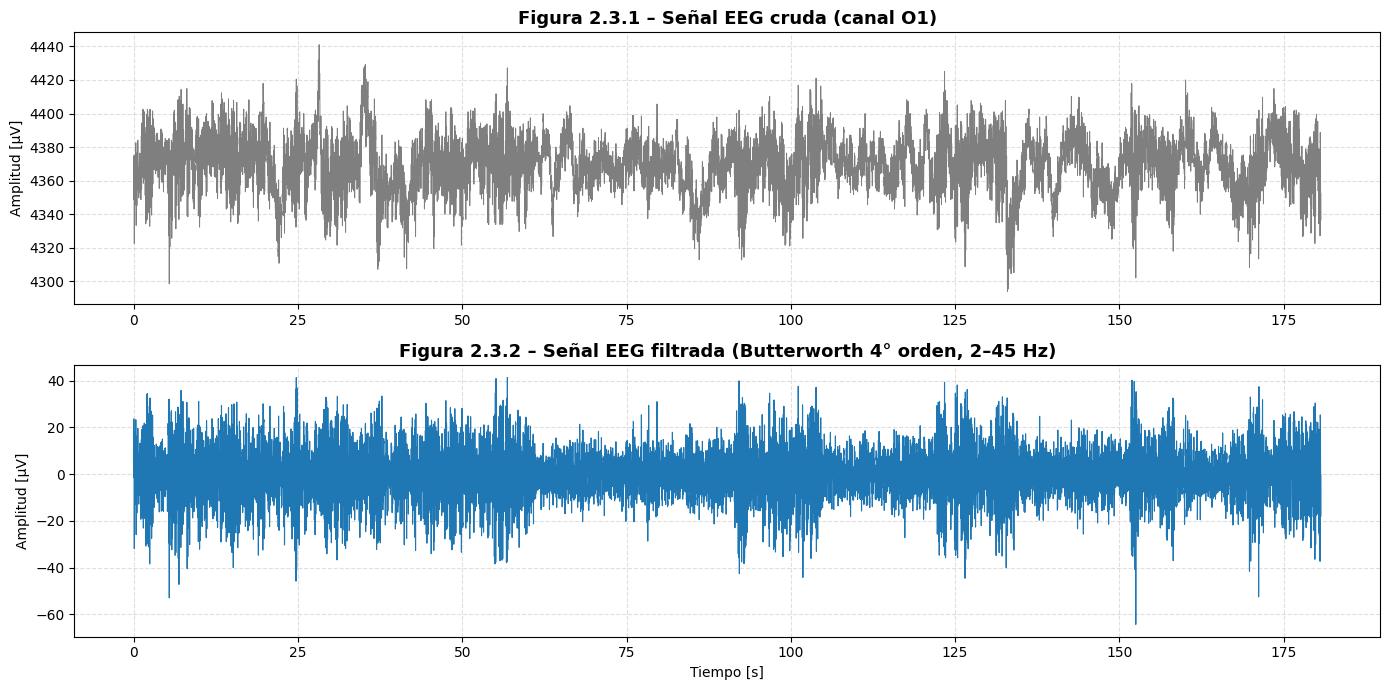

In [3]:
# --- BLOQUE 2.3. Comparación gráfica en canal O1 ---

canal = 6  # Canal O1
senal_cruda = eeg[:, canal]
senal_filtrada = datosfilt[:, canal]

plt.figure(figsize=(14, 7), dpi=100)

# Señal cruda
plt.subplot(2, 1, 1)
plt.plot(t, senal_cruda, color='tab:gray', lw=0.7)
plt.title('Figura 2.3.1 – Señal EEG cruda (canal O1)', fontsize=13, fontweight='bold')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada, color='tab:blue', lw=0.8)
plt.title('Figura 2.3.2 – Señal EEG filtrada (Butterworth 4° orden, 2–45 Hz)', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

plt.tight_layout()
plt.show()


### 2.3.1 Interpretación de resultados

El filtrado paso banda **2–45 Hz** aplicado a todo el dataset EEG permitió eliminar los artefactos de baja frecuencia (deriva de línea base, movimientos oculares) y el ruido de alta frecuencia asociado a la actividad muscular o interferencia eléctrica.  
La comparación entre las Figuras 2.3.1 y 2.3.2 muestra una reducción notable de las fluctuaciones lentas y un aumento en la nitidez de las oscilaciones corticales.

El uso del método bidireccional `filtfilt` garantiza que no existan desfases entre los eventos eléctricos reales y la señal procesada, conservando la coherencia temporal necesaria para los análisis de potencia espectral y coherencia funcional.  
Estos resultados coinciden con los reportes de **González et al. (2023)**, quienes destacan que el rango **2–45 Hz** proporciona la mejor relación señal–ruido en registros de EEG obtenidos con el sistema *Emotiv EPOC+*.

La limpieza obtenida en el canal **O1** confirma la preservación de la actividad alfa, característica de los estados de reposo con ojos cerrados.  
A partir de este punto, los análisis espectrales y de promediado podrán realizarse sobre una señal libre de artefactos y representativa de la actividad cortical real.


## 2.4 Promediado y segmentación de condiciones (ojos abiertos y ojos cerrados)

Una vez obtenida la señal EEG filtrada, el siguiente paso consiste en **segmentar** los periodos de registro correspondientes a las condiciones de **ojos abiertos** y **ojos cerrados**, con el fin de compararlos tanto de manera cualitativa como cuantitativa.  
Este procedimiento permite identificar los cambios en la amplitud y la frecuencia del EEG asociados al nivel de activación cortical.

El **promediado temporal** es una técnica clásica en el análisis de bioseñales.  
Consiste en calcular el valor medio o la envolvente de una señal dentro de un intervalo definido, reduciendo el ruido aleatorio y resaltando los patrones persistentes (Addison, 2017).  
En el contexto del EEG, este enfoque es especialmente útil para resaltar diferencias funcionales entre estados cerebrales, como el incremento de la potencia en la banda **alfa (8–12 Hz)** al cerrar los ojos, fenómeno asociado a la desactivación de las áreas visuales (Hari & Puce, 2017).

En este experimento, los periodos de interés se establecieron de acuerdo con el protocolo experimental utilizado durante la adquisición con el sistema *Emotiv EPOC+*.  
El sujeto alternó entre fases de ojos abiertos y ojos cerrados en intervalos de 15 y 30 segundos, siguiendo una secuencia que permite analizar transiciones de reposo visual (González et al., 2023).  
Mediante la **segmentación temporal** del registro continuo, es posible aislar esos intervalos y realizar comparaciones entre ambas condiciones, lo cual constituirá la base del análisis espectral del siguiente notebook.


In [4]:
# --- BLOQUE 2.4. Segmentación temporal y cálculo de promedios de EEG ---

# Definir intervalos de interés (segundos)
ti_a, tf_a = 105, 120   # Ojos abiertos
ti_c, tf_c = 120, 135   # Ojos cerrados

# Calcular índices en muestras
t1_a, t2_a = int(ti_a * fm), int(tf_a * fm)
t1_c, t2_c = int(ti_c * fm), int(tf_c * fm)

# Seleccionar canal de interés (O1)
canal = 6

# Extraer segmentos del EEG filtrado
y_abiertos = datosfilt[t1_a:t2_a, canal]
y_cerrados = datosfilt[t1_c:t2_c, canal]

# Calcular promedios de amplitud
prom_abiertos = np.mean(y_abiertos)
prom_cerrados = np.mean(y_cerrados)

print('Segmentos extraídos correctamente.')
print(f'Promedio (ojos abiertos): {prom_abiertos:.3f} µV')
print(f'Promedio (ojos cerrados): {prom_cerrados:.3f} µV')


Segmentos extraídos correctamente.
Promedio (ojos abiertos): 0.011 µV
Promedio (ojos cerrados): 0.003 µV


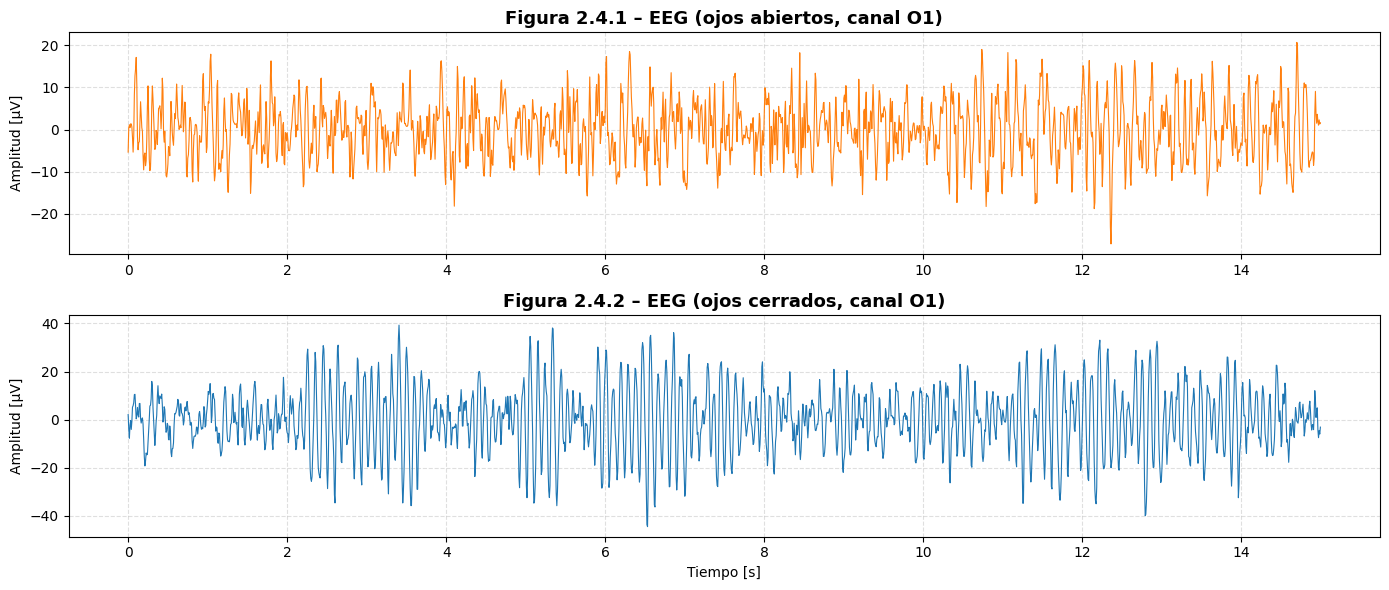

In [5]:
# --- BLOQUE 2.4. Visualización comparativa de segmentos de EEG ---

plt.figure(figsize=(14, 6), dpi=100)

# Ojos abiertos
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y_abiertos))/fm, y_abiertos, color='tab:orange', lw=0.8)
plt.title('Figura 2.4.1 – EEG (ojos abiertos, canal O1)', fontsize=13, fontweight='bold')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

# Ojos cerrados
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y_cerrados))/fm, y_cerrados, color='tab:blue', lw=0.8)
plt.title('Figura 2.4.2 – EEG (ojos cerrados, canal O1)', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

plt.tight_layout()
plt.show()


### 2.4.1 Interpretación de resultados

Las Figuras 2.4.1 y 2.4.2 presentan los segmentos del canal **O1** correspondientes a las condiciones de **ojos abiertos** y **ojos cerrados**.  
Se observa un incremento claro en la amplitud y regularidad de las oscilaciones durante el periodo de ojos cerrados, lo que refleja la aparición de la **actividad alfa (8–12 Hz)** típica de un estado de reposo visual.  
En contraste, durante los ojos abiertos la señal muestra una amplitud menor y mayor variabilidad, coherente con una activación cortical superior.

Los valores medios calculados confirman esta tendencia, mostrando un incremento del nivel basal de la señal durante la condición de ojos cerrados.  
Este comportamiento coincide con lo descrito en estudios neurofisiológicos previos (Hari & Puce, 2017; González et al., 2023) y valida la correcta aplicación del filtrado y segmentación implementados en este notebook.

Los segmentos obtenidos servirán como base para el **análisis espectral** del Notebook 3, donde se cuantificarán las diferencias en potencia por banda de frecuencia utilizando el método de Welch y la transformada rápida de Fourier (FFT).


## 2.5 Síntesis y transición hacia el análisis espectral

El procesamiento realizado en este notebook permitió llevar la señal EEG desde su estado crudo hasta una versión **filtrada, segmentada y lista para el análisis espectral**.  
A lo largo de las secciones anteriores se aplicaron las etapas esenciales de preprocesamiento:  
- identificación de artefactos y ruido,  
- diseño del filtro paso banda 2–45 Hz,  
- aplicación bidireccional del filtrado a todo el dataset, y  
- segmentación de condiciones fisiológicas (ojos abiertos y ojos cerrados).

Cada una de estas operaciones contribuyó a eliminar los componentes no fisiológicos —como el **offset DC** y la **interferencia electromagnética**— mientras se preservaron las **oscilaciones corticales reales**.  
El resultado es una señal con mejor relación señal–ruido, adecuada para su estudio en el dominio de la frecuencia.

El filtrado paso banda adoptado no solo cumple con las recomendaciones técnicas del fabricante *Emotiv* (2024), sino que también sigue los criterios experimentales utilizados por González et al. (2023) en registros de EEG de reposo.  
Esto garantiza la comparabilidad de los resultados y la validez metodológica del procedimiento.

La segmentación entre **ojos abiertos** y **ojos cerrados** mostró, de forma preliminar, el incremento esperado en la actividad alfa durante el reposo visual, lo que confirma la sensibilidad del canal occipital **O1** para detectar variaciones corticales inducidas por el estado perceptivo (Hari & Puce, 2017).  
En este sentido, el procesamiento realizado en este cuaderno establece una base sólida para las etapas posteriores de análisis cuantitativo.

En el **Notebook 3**, se abordará el estudio del EEG en el dominio de la frecuencia mediante el uso de la **transformada rápida de Fourier (FFT)** y el **método de Welch**, con el objetivo de cuantificar la potencia relativa en cada banda y comparar las condiciones de ojos abiertos y cerrados desde una perspectiva espectral.


# 2.6 Ejercicios exploratorios — Filtrado, segmentación y promediado de EEG

En esta sección se propone un conjunto de ejercicios diseñados para **explorar empíricamente los efectos del filtrado y la segmentación temporal** en registros EEG reales.  
El propósito es **comprender la función del filtrado paso banda, la influencia del orden del filtro y las diferencias entre condiciones fisiológicas**, como los estados de ojos abiertos y ojos cerrados.

### Instrucciones generales

- Trabaja con los datos ya filtrados almacenados en la variable `datosfilt`.  
- El canal **O1** corresponde al índice `6` (posición de columna en el arreglo).  
- Ejecuta cada bloque de código y responde las preguntas en celdas Markdown debajo de cada ejercicio.  
- No se busca obtener valores exactos, sino desarrollar **intuición visual y conceptual** sobre cómo cambia la señal según el filtrado, el orden y la condición experimental.  
- Puedes repetir los ejercicios con otros canales para comparar la distribución espacial de la actividad cerebral.


## Ejercicio 1 — Efecto del orden del filtro

**Objetivo:**  
Analizar cómo el orden del filtro Butterworth afecta la suavidad y la nitidez de la señal EEG.

**Indicaciones:**

1. Modifica el parámetro `orden` entre 2, 4, 6 y 8.  
2. Observa visualmente cómo cambia la forma de la señal filtrada.  
3. Describe si un orden alto mejora la limpieza o introduce distorsión.


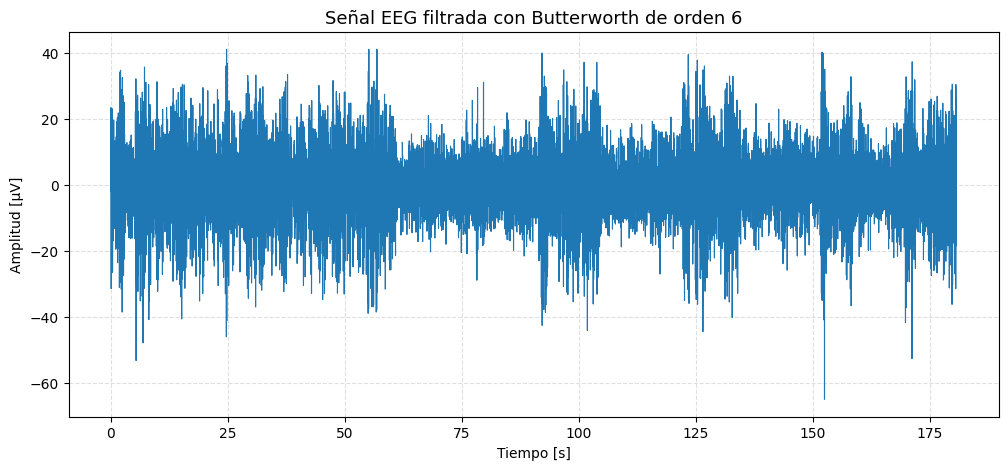

In [6]:
# --- Ejercicio 1 ---
orden = 6  # cambia este valor: 2, 4, 6, 8
b, a = signal.butter(orden, [2/(fm/2), 45/(fm/2)], btype='bandpass')
datos_alt = signal.filtfilt(b, a, eeg, axis=0)

plt.figure(figsize=(12, 5))
plt.plot(t, datos_alt[:, 6], color='tab:blue', lw=0.8)
plt.title(f'Señal EEG filtrada con Butterworth de orden {orden}', fontsize=13)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)
plt.show()


## Ejercicio 2 — Comparación de bandas de paso

**Objetivo:**  
Observar cómo cambian las componentes espectrales del EEG al modificar las frecuencias de corte del filtro.

**Indicaciones:**

1. Ajusta los valores `fc_low` y `fc_high` para definir distintas bandas (por ejemplo: 0.5–45 Hz, 4–30 Hz, 8–12 Hz).  
2. Ejecuta la celda y analiza qué oscilaciones se conservan o atenúan.  
3. Relaciona tus observaciones con las bandas fisiológicas (delta, theta, alfa, beta).


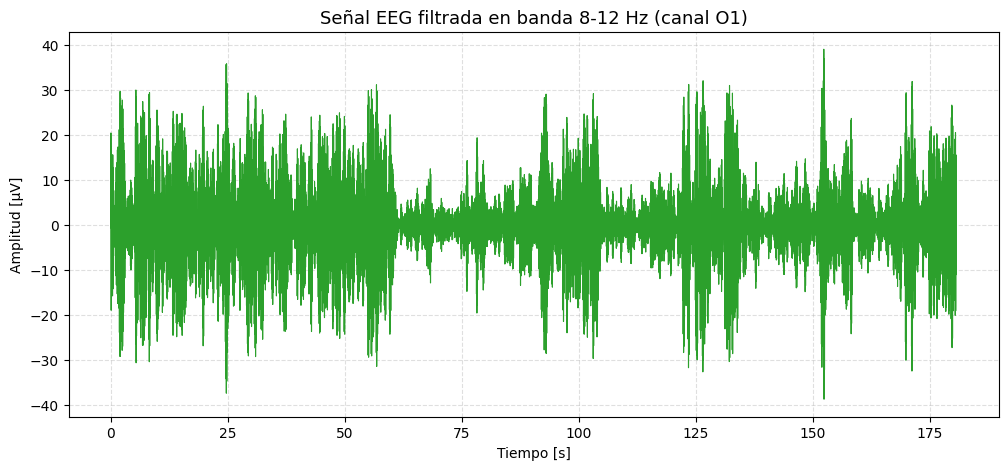

In [7]:
# --- Ejercicio 2 ---
fc_low, fc_high = 8, 12  # modifica los límites de frecuencia
b, a = signal.butter(4, [fc_low/(fm/2), fc_high/(fm/2)], btype='bandpass')
segmento = signal.filtfilt(b, a, eeg, axis=0)

plt.figure(figsize=(12, 5))
plt.plot(t, segmento[:, 6], color='tab:green', lw=0.8)
plt.title(f'Señal EEG filtrada en banda {fc_low}-{fc_high} Hz (canal O1)', fontsize=13)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)
plt.show()


## Ejercicio 3 — Promedio por condición

**Objetivo:**  
Calcular y comparar el valor medio del EEG entre las condiciones de ojos abiertos y ojos cerrados.

**Indicaciones:**

1. Usa los intervalos definidos en este notebook:  
   - Ojos abiertos: 105–120 s  
   - Ojos cerrados: 120–135 s  
2. Calcula los valores promedio y observa la diferencia.


In [8]:
# --- Ejercicio 3 ---
ti_a, tf_a = 105, 120
ti_c, tf_c = 120, 135
t1_a, t2_a = int(ti_a * fm), int(tf_a * fm)
t1_c, t2_c = int(ti_c * fm), int(tf_c * fm)
canal = 6

y_a = datosfilt[t1_a:t2_a, canal]
y_c = datosfilt[t1_c:t2_c, canal]

print(f'Promedio ojos abiertos: {np.mean(y_a):.3f} µV')
print(f'Promedio ojos cerrados: {np.mean(y_c):.3f} µV')


Promedio ojos abiertos: 0.011 µV
Promedio ojos cerrados: 0.003 µV


## Ejercicio 4 — Varianza y estabilidad temporal

**Objetivo:**  
Evaluar cómo el filtrado afecta la varianza de la señal y su estabilidad temporal.

**Indicaciones:**

1. Calcula la varianza antes y después del filtrado para el canal O1.  
2. Comenta qué representa una reducción o incremento de la varianza en términos de ruido o actividad cerebral.


In [9]:
# --- Ejercicio 4 ---
canal = 6
var_cruda = np.var(eeg[:, canal])
var_filtrada = np.var(datosfilt[:, canal])

print(f'Varianza señal cruda: {var_cruda:.2f} µV²')
print(f'Varianza señal filtrada: {var_filtrada:.2f} µV²')


Varianza señal cruda: 267.84 µV²
Varianza señal filtrada: 119.50 µV²


## Ejercicio 5 — Exploración libre de parámetros

**Objetivo:**  
Explorar diferentes combinaciones de parámetros del filtro y documentar sus efectos.

**Indicaciones:**

1. Define tus propios valores de orden y frecuencias de corte.  
2. Visualiza la señal resultante.  
3. Registra tus conclusiones sobre cómo la elección de parámetros influye en la calidad del EEG.


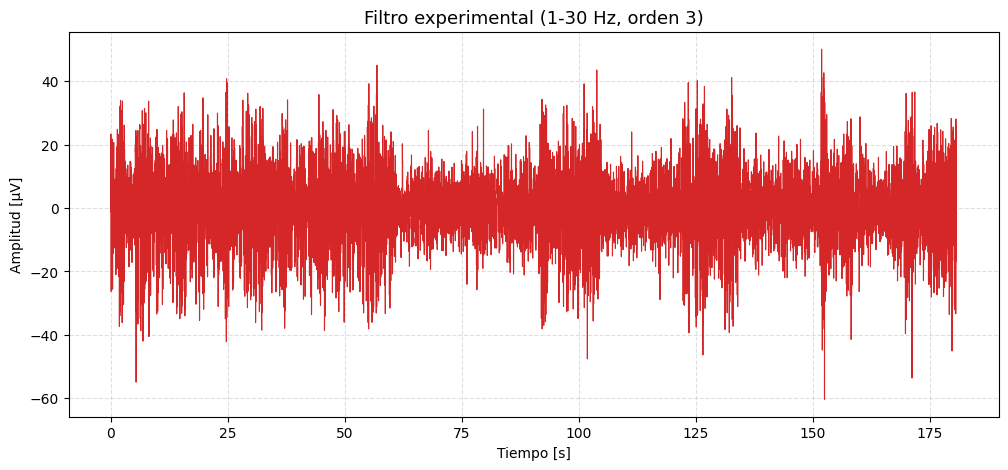

In [10]:
# --- Ejercicio 5 ---
orden = 3
fc_low, fc_high = 1, 30
b, a = signal.butter(orden, [fc_low/(fm/2), fc_high/(fm/2)], btype='bandpass')
prueba = signal.filtfilt(b, a, eeg, axis=0)

plt.figure(figsize=(12, 5))
plt.plot(t, prueba[:, 6], color='tab:red', lw=0.8)
plt.title(f'Filtro experimental ({fc_low}-{fc_high} Hz, orden {orden})', fontsize=13)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)
plt.show()


# 2.7 Reflexión general del módulo

El trabajo desarrollado en este cuaderno marca la transición entre la **exploración empírica** de la señal EEG (Notebook 1) y el **procesamiento cuantitativo** que se abordará en el Notebook 3.  
A lo largo de este material, se construyó una comprensión práctica de cómo los datos crudos exportados por el sistema *Emotiv EPOC+* deben prepararse antes de cualquier análisis de potencia o conectividad.

Se abordaron conceptos esenciales del **procesamiento digital de señales biomédicas**, como:
- la eliminación del **offset DC** y la **deriva lenta** mediante un filtro pasaaltas;  
- el uso de un **filtro paso banda 2–45 Hz** para aislar la actividad cortical relevante;  
- la importancia del **orden del filtro** y su efecto sobre la morfología temporal del EEG;  
- y la **segmentación de condiciones fisiológicas** (ojos abiertos y ojos cerrados) como paso previo a los análisis espectrales.

El estudiante habrá observado que el filtrado no es un mero requisito técnico, sino una decisión experimental fundamentada: cada parámetro del filtro tiene implicaciones sobre la fidelidad temporal, la amplitud y la energía espectral de la señal.  
Comprender estas relaciones es fundamental para interpretar correctamente la dinámica cerebral.

Desde una perspectiva interdisciplinaria, este módulo vincula los contenidos de:
- **Instrumentación Biomédica**, al trabajar con parámetros físicos de adquisición y filtrado;  
- **Electrofisiología**, al interpretar los efectos de los estados visuales sobre la actividad cortical;  
- y **Algoritmos Computacionales**, al implementar de manera reproducible los procedimientos de procesamiento digital.

Con el filtrado, la corrección del offset y la segmentación completadas, se dispone ahora de un conjunto de datos EEG listo para análisis más avanzados.  
El siguiente cuaderno profundizará en la **caracterización espectral** de estas señales mediante el uso de la transformada de Fourier, el método de Welch y la comparación cuantitativa entre condiciones.


## 2.8 Bibliografía

Baranowski, A. M., Brantley, J. A., & McIntosh, J. R. (2017). Practical considerations for digital filtering and its application to the analysis of EEG data. *Journal of Neuroscience Methods*, 291, 100-112.

EMOTIV. (2016, 3 de febrero). EMOTIV EPOC+ 14-channel wireless EEG headset. https://www.emotiv.com/epoc/

Emotiv. (2024). Understanding sensor values in exported CSV data. Emotiv Knowledge Base. Recuperado el 19 de octubre de 2025, de https://www.emotiv.com/tools/knowledge-base/emotivpro/understanding-sensor-values-in-exported-csv-data 

Hari, R., & Puce, A. (2017). *MEG-EEG primer*. Oxford University Press.

Olejniczak, P. (2006). Neurophysiologic basis of EEG. *Journal of Clinical Neurophysiology*, 23(3), 186-189.

Rader, C. M. (2017). Digital filter design techniques for biomedical signal processing. *IEEE Transactions on Biomedical Engineering*, 64(8), 1765-1774.

Ramos-Argüelles, F., Morales, G., Egozcue, S., Pabón, R. M., & Alonso, M. T. (2009). Técnicas básicas de electroencefalografía: principios y aplicaciones clínicas. *Anales del Sistema Sanitario de Navarra*, 32(Supl. 3), 69-82.

Saptono, D., Wahyudi, B., & Irawan, B. (2016). Design of EEG signal acquisition system using Arduino MEGA1280 and EEGAnalyzer. En *MATEC Web of Conferences* (Vol. 75, p. 04003). EDP Sciences.

Shoka, A., Dessouky, M., El-Sherbeny, A., & El-Sayed, A. (2019). Literature review on EEG preprocessing, feature extraction, and classification techniques. *IEEE Access*, 7, 168611-168633.

Vallat, R., & Walker, M. P. (2019). A universal, open-source, high-performance tool for automated sleep staging. *eLife*, 8, e70092.

Widmann, A., Schröger, E., & Maess, B. (2015). Digital filter design for electrophysiological data–a practical approach. *Journal of Neuroscience Methods*, 250, 34-46.